In [1]:
import cv2
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from utils.blockInfluence import training, prediction,visualize_bloc


# Etude des blocs avec les meilleures scores de prédiction

In [23]:
INPUT_DATA_FOLDER = "../output/datasets/" #folder where are stored the datasets
DATA_FOLDER = "../data/" # folder where are stored the images
DATASETS = [13,14,15] # datasets to train and test

IMG_RANGE = 6 #range of image (in the shuffled test set, unique number) that you want to visualize
DATASET_RANGE = 2 # dataset range for this image (ex : you want this image in the dataset 14, so DATASET_RANGE=1)

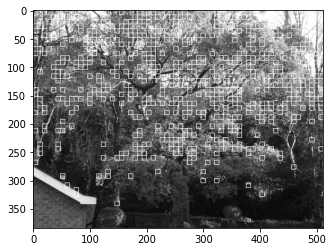

In [24]:
# Créer et entraîner le modèle
model = RandomForestClassifier(max_depth=10, criterion='entropy', random_state=0)
model, df_train, df_test = training(model, INPUT_DATA_FOLDER, DATASETS)

# résultats de prédiction sur le test set
my_test = prediction(model, df_test, DATASETS)


# visualiser sur l'image les blocs de score supérieur à 90% des scores
img_res, bl_pred, vis = visualize_bloc(DATA_FOLDER, DATASETS, my_test, IMG_RANGE, DATASET_RANGE, 0.9)

## Histogrammes des blocs avec les 10% meilleures scores de prédictions

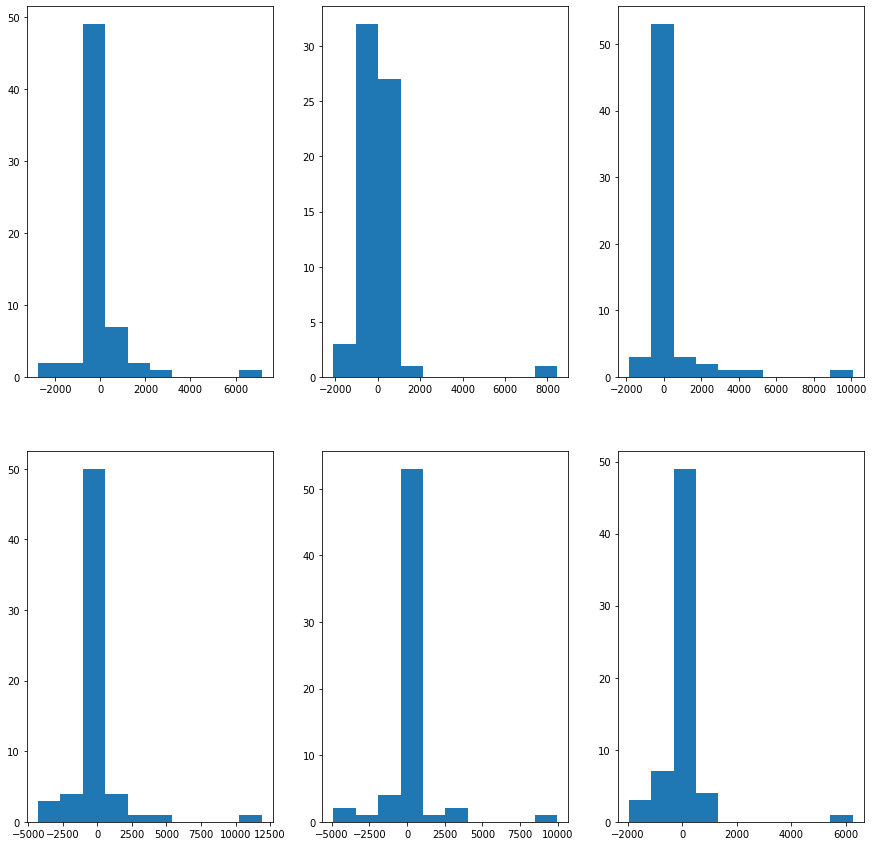

In [25]:
s90 = my_test[my_test['class']==DATASETS[DATASET_RANGE]].pred_proba.quantile([0.1]).values[0]
plt.figure(figsize=(15,15))
i = 1
for bloc_dct in bl_pred[bl_pred['pred_proba']>=s90]['dct'][:6]:
    plt.subplot(2,3,i)
    i = i+1
    plt.hist(bloc_dct)


## Histogrammes des blocs avec les 10% de scores de prédictions les moins bonnes

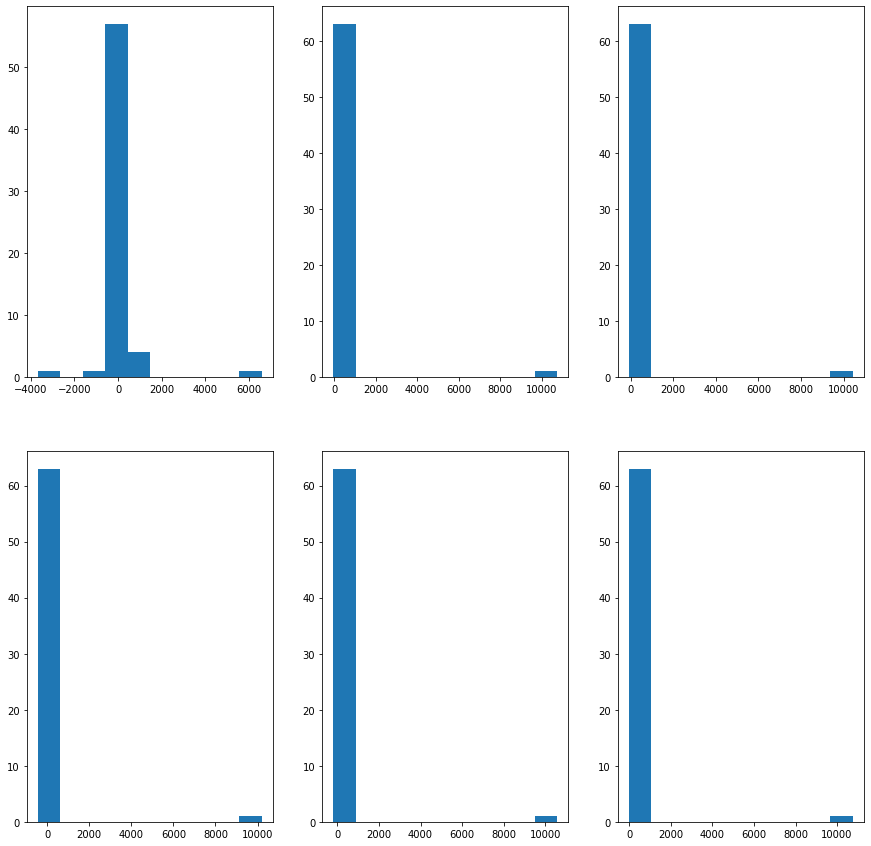

In [26]:
s10 = my_test[my_test['class']==DATASETS[DATASET_RANGE]].pred_proba.quantile([0.1]).values[0]
plt.figure(figsize=(15,15))
i = 1
for bloc_dct in bl_pred[bl_pred['pred_proba']<=s10]['dct'][:6]:
    plt.subplot(2,3,i)
    i = i+1
    plt.hist(bloc_dct)